# Titanic Daten


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Daten einlesen

In [2]:
input = "../input/titanic/"
INPUT_FILE = os.path.join(input, "train.csv")
INPUT_FILE2 = os.path.join(input, "test.csv")
INPUT_FILE3 = os.path.join(input, "gender_submission.csv")


train_df = pd.read_csv(INPUT_FILE)
test_df = pd.read_csv(INPUT_FILE2)
test_df2 = pd.read_csv(INPUT_FILE3)

In [3]:
test_df_neu = pd.merge(test_df,
                 test_df2,
                 on='PassengerId')

frames = [train_df, test_df_neu]
  
df = pd.concat(frames)

df.drop(['PassengerId'],axis=1, inplace=True)
display(df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.shape

(1309, 11)

In [5]:
df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).median().sort_values(by='Fare', ascending=False)

,Pclass,Fare
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [6]:
df[['Fare']].median()

Fare    14.4542
dtype: float64

In [7]:
print(df)

df.info()

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
413         0       3                                 Spector, Mr. Woolf   
414         1       1                       Oliva y Ocana, Dona. Fermina   
415         0       3                       Saether, Mr. Simon Sivertsen   
416         0       3                                Ware, Mr. Frederick   
417         0       3                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      m

In [8]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [9]:
for col in df.columns:
    print(f"{col}:\n{df[col].unique()}\n")

Survived:
[0 1]

Pclass:
[3 1 2]

Name:
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']

Sex:
['male' 'female']

Age:
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

SibSp:
[1 0 3 4 2 5 8]

Parch:
[0 1 2 5 3 4 6 9]

Ticket:
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' 

In [10]:
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0

In [11]:
df.drop(['Ticket'],axis=1, inplace=True)

In [12]:
df.drop(['Name'],axis=1, inplace=True)

In [13]:
df = pd.get_dummies(df, columns=["Cabin", "Embarked"])

In [14]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [15]:
nan_percent=missing_percent(df)
print(nan_percent)

Fare     0.076394
Age     20.091673
dtype: float64


In [16]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [17]:
df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))

In [18]:
df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).median().sort_values(by='Fare', ascending=False)

,Pclass,Fare
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [19]:
df['Fare'].median()

14.4542

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,1309.0,NaN,NaN,NaN,0.377387,0.484918,0.00,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.00,2.0,3.0,3.0,3.0
Sex,1309.0,2.0,1.0,843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1309.0,NaN,NaN,NaN,29.503186,12.905241,0.17,22.0,28.0,35.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.00,0.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,1309.0,NaN,NaN,NaN,0.003820,0.061709,0.00,0.0,0.0,0.0,1.0
Cabin_T,1309.0,NaN,NaN,NaN,0.000764,0.027639,0.00,0.0,0.0,0.0,1.0
Embarked_C,1309.0,NaN,NaN,NaN,0.206264,0.404777,0.00,0.0,0.0,0.0,1.0
Embarked_Q,1309.0,NaN,NaN,NaN,0.093965,0.291891,0.00,0.0,0.0,0.0,1.0


In [21]:
df['Sex'] = df['Sex'].astype('int')

In [22]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 

scaler=StandardScaler()

scale_var = ['Pclass','Age','SibSp','Fare']

df_raw = df

In [23]:
df_raw[scale_var]=scaler.fit_transform(df_raw[scale_var])

In [24]:
print(df_raw)

     Survived    Pclass  Sex       Age     SibSp  Parch      Fare  Cabin_A10  \
0           0  0.841916    1 -0.581628  0.481288      0 -0.503176          0   
1           1 -1.546098    0  0.658652  0.481288      0  0.734809          0   
2           1  0.841916    0 -0.271558 -0.479087      0 -0.490126          0   
3           1 -1.546098    0  0.426099  0.481288      0  0.383263          0   
4           0  0.841916    1  0.426099 -0.479087      0 -0.487709          0   
..        ...       ...  ...       ...       ...    ...       ...        ...   
413         0  0.841916    1 -0.116523 -0.479087      0 -0.487709          0   
414         1 -1.546098    0  0.736169 -0.479087      0  1.462069          0   
415         0  0.841916    1  0.697411 -0.479087      0 -0.503176          0   
416         0  0.841916    1 -0.116523 -0.479087      0 -0.487709          0   
417         0  0.841916    1 -0.116523  0.481288      1 -0.211081          0   

     Cabin_A11  Cabin_A14  ...  Cabin_F

In [25]:
X=df_raw.drop('Survived',axis=1)
y=df_raw['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Hilfsfunktion(en)

In [32]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='elasticnet', C=1e42, solver='saga', l1_ratio=0.5, max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logistic_regression = logreg.predict(X_test)

d:\Dev\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [34]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy on training set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(X_test, y_test)))

print("Precision:", precision_score(y_test, y_pred_logistic_regression))
print("Recall:", recall_score(y_test, y_pred_logistic_regression))
print("F1-Score:", f1_score(y_test, y_pred_logistic_regression))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logistic_regression))

Accuracy on training set: 0.8908
Accuracy on test set: 0.8626
Precision: 0.8538461538461538
Recall: 0.7602739726027398
F1-Score: 0.8043478260869564
ROC-AUC: 0.8416754478398315


In [36]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_logistic_regression)
np.set_printoptions(precision=2)
cnf_matrix

array([[228,  19],
       [ 35, 111]], dtype=int64)

Confusion matrix, without normalization
[[228  19]
 [ 35 111]]
Normalized confusion matrix
[[0.92 0.08]
 [0.24 0.76]]


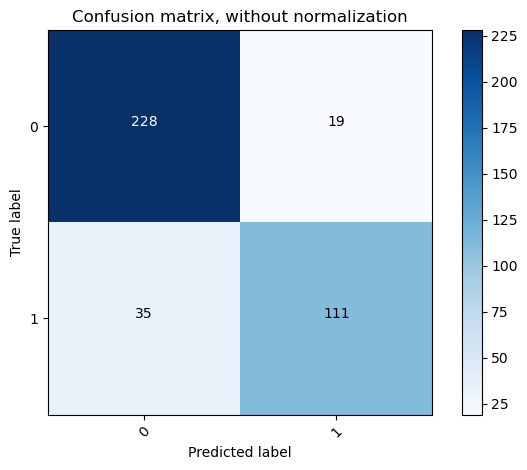

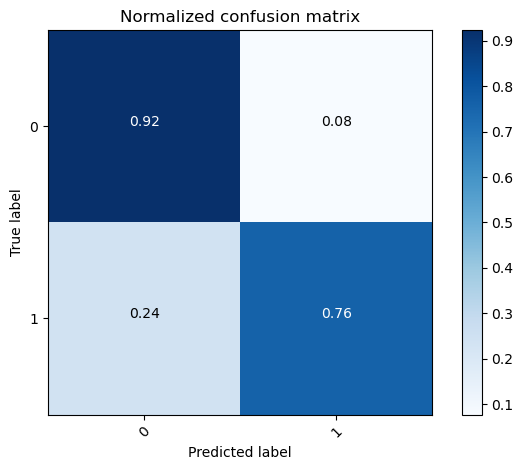

In [37]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [27]:
import xgboost as xgb

In [28]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', 
random_state=33, subsample = 0.5, min_child_weight = 1,  
n_estimators=600, learning_rate=0.01, max_depth = 10 , gamma = 2, colsample_bytree = 0.6)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

{'subsample': 1.0, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 1, 'colsample_bytree': 1.0}
{'subsample': 0.5, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.6}

{'subsample': 0.5,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.01,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [29]:
print("Accuracy on training set: {:.4f}".format(xgb_model.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(xgb_model.score(X_test, y_test)))

Accuracy on training set: 0.8919
Accuracy on test set: 0.8677


In [30]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0 , 0.5, 1,  2, 5],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 10],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        }

In [187]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold


folds = 3
param_comb = 30

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 101)

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, 
scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=101 )


random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.905 total time=   1.5s
[CV 2/3] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.865 total time=   1.5s
[CV 3/3] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=3, min_child_weight=10, subsample=1.0;, score=0.918 total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=10, subsample=1.0;, score=0.901 total time=   1.9s
[CV 2/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=10, subsample=1.0;, score=0.862 total time=   2.3s
[CV 3/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=10, subsample=1.0;, score=0.916 total time=   2.4s
[CV 1/3] END colsample_bytree=0.8, gamma=0, learning_rate=0.0001, max

Text(0.5, 0, 'Xgboost Feature Importance')

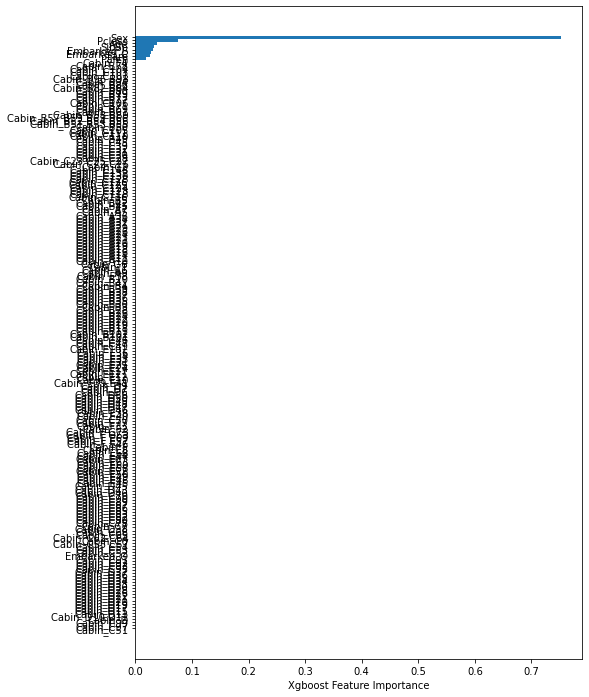

In [174]:
# plt.figure(figsize=(8,12))
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


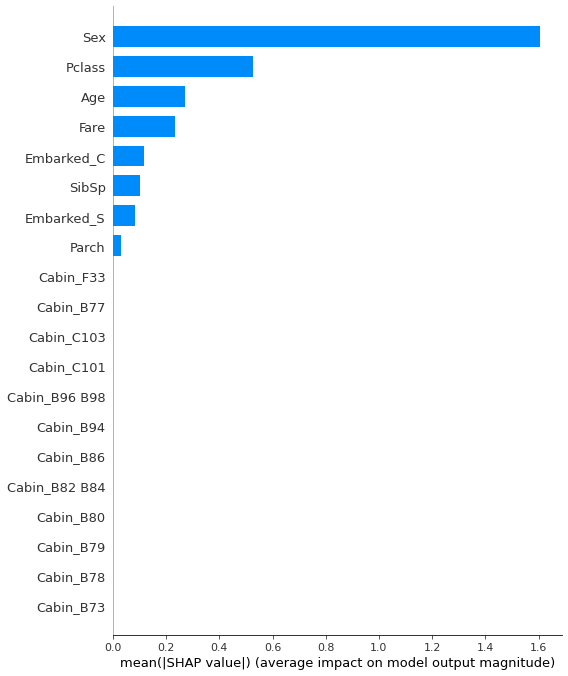

In [177]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [192]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[231,  16],
       [ 35, 111]])

In [165]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print( "Area Under PR Curve(AP): %0.2f" % area ) #should be same as AP?

print( 'AP', average_precision_score(y_test, y_pred, average='weighted'))


Area Under PR Curve(AP): 0.84
AP 0.7235728922850889
